<a href="https://colab.research.google.com/github/pedro-bunn/analise_dados/blob/main/ANALISE_ALUGUEIS_TEMPORARIOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seção 1 - Análise exploratória sobre os dados dos aluguéis em NY

Obs: Quando citado valores de quaisquer tipos Ex: Price = 1500, não foram colocados suas unidades pois a tabela não nos forneceu.

In [1]:
#Importanto as bibliotecas para análise
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#Importanto a base
import gdown
file_id = '10zl498hErmQmz78oJJ4dFRQn793VNE3K'

# URL de compartilhamento público do Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Nome do arquivo local que será salvo
output = 'teste_indicium_precificacao.csv'

# Faz o download do arquivo do Google Drive e salva localmente
gdown.download(url, output, quiet=False)

# Lê o arquivo CSV usando pandas
dataset = pd.read_csv(output)
dataset.info()


Downloading...
From: https://drive.google.com/uc?id=10zl498hErmQmz78oJJ4dFRQn793VNE3K
To: /content/teste_indicium_precificacao.csv
100%|██████████| 7.08M/7.08M [00:00<00:00, 57.6MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [3]:
dataset

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#Entendendo aonde temos valores vazio nas colunas da tabela
#Com este valor podemos saber como podemos proceder com a tabela
valores_vazios_soma = dataset.isnull().sum()
print(valores_vazios_soma)


id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


dataset.head(10)

In [5]:
#Tranformando o tipo do quarto em numeros para faciliar entendimento graficamente
dataset['room_type'], labels_room_types = pd.factorize(dataset['room_type'])


In [6]:
#Apresentamos o novo dataset e os room types
dataset.head(10)
print(labels_room_types)

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object')


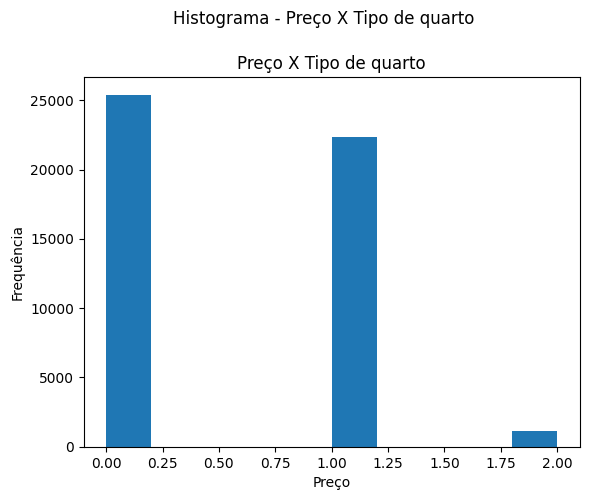

In [7]:
#Plotando alguns gráficos para entender comportamentos do preço x tipo de quarto
# Gráfico de barras para a idade
dataset.plot(kind='hist', x='price', y='room_type', legend=False)
plt.title('Preço X Tipo de quarto')
plt.ylabel('Preço')
plt.xlabel('Tipo do quarto')


# Mapeamento para rótulos da legenda
room_type_labels = {0: '0 - Entire home/apt', 1: '1 - Private room', 2: '2 - Shared room'}

# Adicionar título e rótulos aos eixos
plt.suptitle('Histograma - Preço X Tipo de quarto', y=1.02)
plt.ylabel('Frequência')
plt.xlabel('Preço')

# Exibir o gráfico
plt.show()


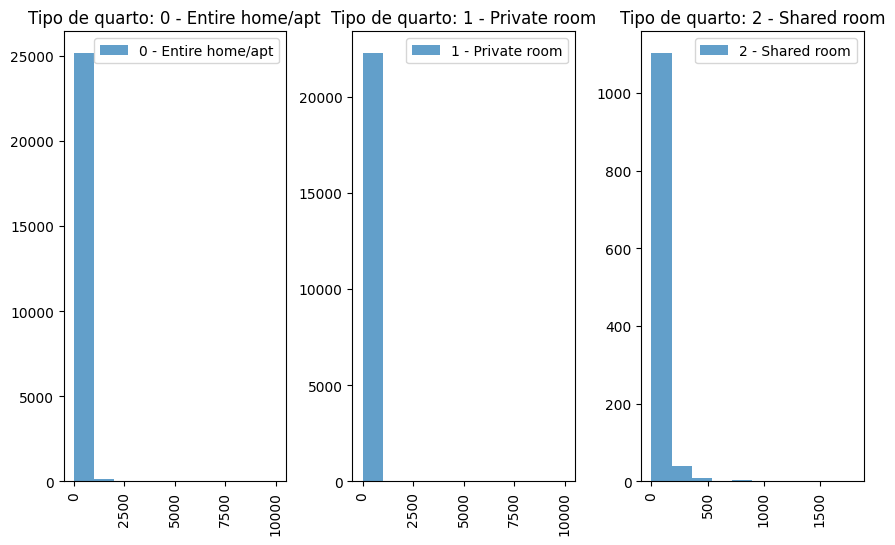

In [8]:
# Criar um histograma
ax = dataset['price'].hist(by=dataset['room_type'], bins=10, alpha=0.7, figsize=(10, 6), layout=(1, 3), legend=False)

# Adicionar legenda personalizada
for i, ax in enumerate(ax.flatten()):
    ax.legend([room_type_labels[i]])
    ax.set_title(f'Tipo de quarto: {room_type_labels[i]}')

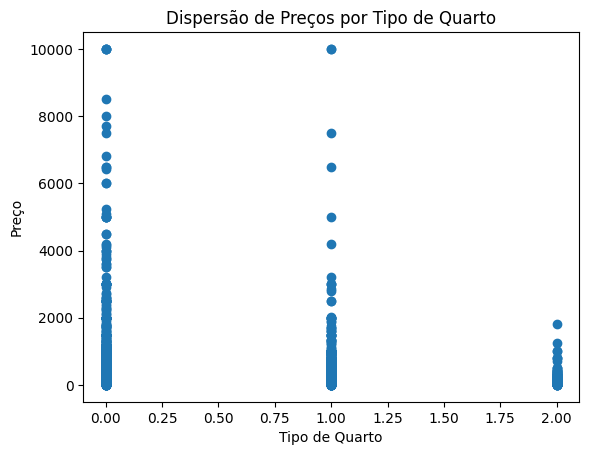

In [9]:
plt.scatter(dataset['room_type'], dataset['price'])
plt.title('Dispersão de Preços por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço')
plt.show()


O primeiro ponto que pode-se notar é que desta análise são que os preços mais altos são dos apartamentos do tipo *Entire Home/Apt* seguidos dos *Private rooms* e posteriormente os *Shared rooms*


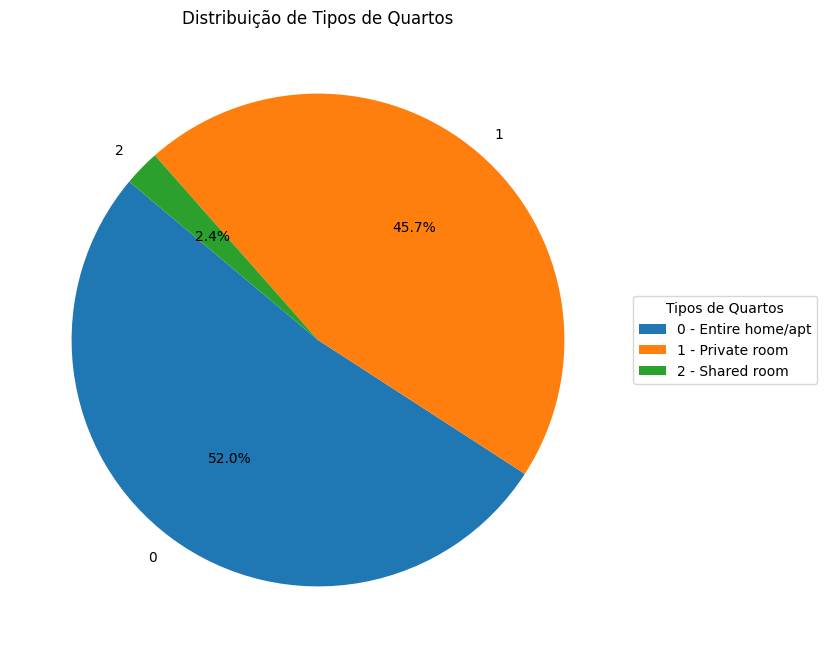

In [10]:
#Encontrando o somatório de tipo de valores de cada uma das categorias
soma_total_unidade_quartos = dataset.room_type.value_counts()
legenda_quartos = ['0 - Entire home/apt', '1 - Private room', '2 - Shared room']
# Criando o gráfico de pizza para entender a distribuição dos quuartos pelo conjunto de dados
plt.figure(figsize=(8, 8))
plt.pie(soma_total_unidade_quartos, labels=soma_total_unidade_quartos.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Tipos de Quartos')
# Adicionando a legenda
plt.legend(legenda_quartos, title='Tipos de Quartos', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [11]:
#Soma da quantidade que cada quarto possui.
soma_total_unidade_quartos = dataset['room_type'].value_counts()
print(soma_total_unidade_quartos)

0    25409
1    22325
2     1160
Name: room_type, dtype: int64


Outra análise interessante a ser feita é a quantidade do tipo de quarto sendo:
Entire home/apt -> 52%
Private room -> aproximadamente 46%
Shared romm -> Aproximadamente 2%

In [12]:
# Obtendo as colunas que você deseja transformar
colunas_grupo_bairro = ['bairro_group']
coluna_bairro = ['bairro']

# Aplicando one-hot encoding
dataset_one_hot_encoded_bairro_group = pd.get_dummies(dataset, columns=colunas_grupo_bairro)
dataset_one_hot_encoded_bairro = pd.get_dummies(dataset, columns=coluna_bairro)

#Procurando a quantidade de valores de bairros únicos.
valores_unicos = dataset_one_hot_encoded_bairro_group['bairro'].unique()
quantidade_valores_unicos = len(valores_unicos)
print(f"A quantidade de valores únicos na coluna é: {quantidade_valores_unicos}")


A quantidade de valores únicos na coluna é: 221


In [13]:
#Capturamos cada um dos valores dados ao novo nome do grupo de bairros
# Exibindo as colunas de interesse no DataFrame transformado
colunas_interesse = [col for col in dataset_one_hot_encoded_bairro_group.columns if any(bairro in col for bairro in colunas_grupo_bairro)]

#Adicionando também a coluna price e tipo de sala
colunas_interesse.append('price')  # Adicionando a coluna 'price' à lista
colunas_interesse.append('room_type')  # Adicionando a coluna 'room_type' à lista


df_bairro_valor_tipo_imovel = dataset_one_hot_encoded_bairro_group[colunas_interesse]
print('Quantidade de colunas: ', len(colunas_interesse))
print(colunas_interesse)


Quantidade de colunas:  7
['bairro_group_Bronx', 'bairro_group_Brooklyn', 'bairro_group_Manhattan', 'bairro_group_Queens', 'bairro_group_Staten Island', 'price', 'room_type']


In [14]:
#Vamos fazer a separação dos bairros e tipos de quarto também para não termos problemas com o valor e fazer a correlação correta
grupos_por_room_type = df_bairro_valor_tipo_imovel.groupby('room_type')

#Separação dos 3 grupos (Feito desta forma mais rústica com propósito de demonstrar da melhor forma a separação dos grupo e deixar visível no código)
grupo_room_type_0 = grupos_por_room_type.get_group(0)
grupo_room_type_1 = grupos_por_room_type.get_group(1)
grupo_room_type_2 = grupos_por_room_type.get_group(2)

#Agora vamos correlacionar cada um dos dataframes com os grupos corretos
# correlacoes = dataset_one_hot_encoded_bairro_group.corrwith(dataset_one_hot_encoded_bairro_group['price'])
correlacoes_grupo_bairro_0 = grupo_room_type_0.corr()['price']
correlacoes_grupo_bairro_1 = grupo_room_type_1.corr()['price']
correlacoes_grupo_bairro_2 = grupo_room_type_2.corr()['price']

#Criamos as correlações a as elencamos da maior para a menor
correlacoes_ordenadas_0 = correlacoes_grupo_bairro_0.sort_values(ascending=False)
correlacoes_ordenadas_1 = correlacoes_grupo_bairro_1.sort_values(ascending=False)
correlacoes_ordenadas_2 = correlacoes_grupo_bairro_2.sort_values(ascending=False)


In [15]:
print('Correlação de preço por tipo do aluguel Entire Home')
correlacoes_ordenadas_0

Correlação de preço por tipo do aluguel Entire Home


price                         1.000000
bairro_group_Manhattan        0.137067
bairro_group_Staten Island   -0.011158
bairro_group_Bronx           -0.036516
bairro_group_Queens          -0.068347
bairro_group_Brooklyn        -0.091502
room_type                          NaN
Name: price, dtype: float64

In [16]:
print('Correlação de preço por tipo do aluguel Private room')
correlacoes_ordenadas_1


Correlação de preço por tipo do aluguel Private room


price                         1.000000
bairro_group_Manhattan        0.125718
bairro_group_Staten Island   -0.015811
bairro_group_Bronx           -0.024890
bairro_group_Queens          -0.047433
bairro_group_Brooklyn        -0.075588
room_type                          NaN
Name: price, dtype: float64

In [17]:
print('Correlação de preço por tipo do aluguel shared room')
correlacoes_ordenadas_2

Correlação de preço por tipo do aluguel shared room


price                         1.000000
bairro_group_Manhattan        0.155749
bairro_group_Queens          -0.004941
bairro_group_Staten Island   -0.011030
bairro_group_Bronx           -0.023721
bairro_group_Brooklyn        -0.143326
room_type                          NaN
Name: price, dtype: float64

É observada a correlação dos bairros e seus valores por cada tipo de moradia. Podemos pré supor que 'Manhattam' possui o maior valor de mercado de aluguéis seguido por 'Staten Island' e 'Bronx'.

Obs: Vale ressaltar que não separamos as variáveis one hoted coded quando elas eram 0 e 1, por isso vale a pena fazer mais alguns testes para ver se a teoria se sustenta.


In [18]:
#Com as correlações analisada, será utilizado também a estatística aplicada para cada uma destas seleções de bairros + quartos para entender os intervaloes e médias de valores.

In [19]:
#Para fazer a operação, é interessante retirmos o espaço do bairro de Staten Island assim ficando com:
df_bairro_valor_tipo_imovel = df_bairro_valor_tipo_imovel.rename(columns={'bairro_group_Staten Island': 'bairro_group_Staten_Island'})


In [20]:
import pandas as pd

# Criar um DataFrame vazio para armazenar as estatísticas
df_estatisticas = pd.DataFrame(columns=['Bairro', 'Tipo de Quarto', 'Média', 'Desvio Padrão', 'Mínimo', '25%', '50%', '75%', 'Máximo', 'Rank', 'Rank_Preço'])

# Definir a ordem desejada para os bairros e tipos de quarto
ordem_bairros = ['Manhattan', 'Brooklyn', 'Staten_Island', 'Queens', 'Bronx']
ordem_tipos_quarto = [0, 1, 2]

# Loop pelos bairros
for bairro in ordem_bairros:
    # Filtrar por bairro
    grupo_bairro = df_bairro_valor_tipo_imovel.query(f'bairro_group_{bairro} == 1')

    # Loop pelos tipos de quarto
    for tipo_quarto in ordem_tipos_quarto:
        # Filtrar por tipo de quarto
        grupo_quarto = grupo_bairro.query(f'room_type == {tipo_quarto}')

        # Obter estatísticas descritivas
        estatisticas_price = grupo_quarto['price'].describe()

        # Armazenar estatísticas no DataFrame
        chave = f"{bairro} - Tipo {tipo_quarto}"
        df_estatisticas = df_estatisticas.append({
            'Bairro': bairro,
            'Tipo de Quarto': tipo_quarto,
            'Média': estatisticas_price['mean'],
            'Desvio Padrão': estatisticas_price['std'],
            'Mínimo': estatisticas_price['min'],
            '25%': estatisticas_price['25%'],
            '50%': estatisticas_price['50%'],
            '75%': estatisticas_price['75%'],
            'Máximo': estatisticas_price['max'],
            'Rank': f"{ordem_bairros.index(bairro) + 1} - Tipo {tipo_quarto}",
            'Rank_Preço': grupo_quarto['price'].mean()
        }, ignore_index=True)

# Ordenar o DataFrame
df_estatisticas = df_estatisticas.sort_values(by=['Tipo de Quarto', 'Rank_Preço'], ascending=[True, False]).reset_index(drop=True)
df_estatisticas

<ipython-input-20-23356339f2d5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estatisticas = df_estatisticas.append({
<ipython-input-20-23356339f2d5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estatisticas = df_estatisticas.append({
<ipython-input-20-23356339f2d5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estatisticas = df_estatisticas.append({
<ipython-input-20-23356339f2d5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estatisticas = df_estatisticas.append({
<ipython-input-20-23356339f2d5>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

,Bairro,Tipo de Quarto,Média,Desvio Padrão,Mínimo,25%,50%,75%,Máximo,Rank,Rank_Preço
0,Manhattan,0,249.239109,331.830132,0.0,142.5,191.0,259.00,10000.0,1 - Tipo 0,249.239109
1,Brooklyn,0,178.327545,226.415825,0.0,105.0,145.0,199.00,10000.0,2 - Tipo 0,178.327545
2,Staten_Island,0,173.846591,394.600216,48.0,75.0,100.0,151.25,5000.0,3 - Tipo 0,173.846591
3,Queens,0,147.050573,129.383208,10.0,90.0,120.0,168.25,2600.0,4 - Tipo 0,147.050573
4,Bronx,0,127.506596,95.027102,28.0,80.0,100.0,140.00,1000.0,5 - Tipo 0,127.506596
5,Manhattan,1,116.776622,190.191318,10.0,68.0,90.0,120.00,9999.0,1 - Tipo 1,116.776622
6,Brooklyn,1,76.492942,124.717574,0.0,50.0,65.0,80.00,7500.0,2 - Tipo 1,76.492942
7,Queens,1,71.762456,180.506756,10.0,47.0,60.0,75.00,10000.0,4 - Tipo 1,71.762456
8,Bronx,1,66.788344,107.009071,0.0,40.0,53.5,70.00,2500.0,5 - Tipo 1,66.788344
9,Staten_Island,1,62.292553,36.138245,20.0,40.0,50.0,75.00,300.0,3 - Tipo 1,62.292553


É possível observar que a regra da correlação das variáveis não se manteve pois brookln que possuia
uma correlação negativa aparece com o segundo mais alto valor
médio de casas para alugar.

Com isto temos um novo ranking seguido por:

tipo de quarto 0 (Entire home/apt)

* 'Manhattan',
* 'Brooklyn',
* 'Staten_Island',
* 'Queens',
* 'Bronx'

tipo de quarto 1 (Private Room)
* 'Manhattan'
* 'Brooklyn'
*'Queens'
*'Bronx'
*'Staten_Island'

Tipo de quarto 2 (Shared Room)
* 'Manhattan'
* 'Queens'
* 'Bronx'
* 'Staten_Island'
* 'Brooklyn'

Obs: Esta análise foi baseada apenas nos grupos dos bairros visto que, a quantidade de bairros dentro de cada um destes grupos é igual a 221 deixando a análise mais complexa. Com isto, é visto como interessante utilizar estes os bairros apenas se necessário para alguma busca ou criação de algum modelo específico.


# Seção 2 - Responda também às seguintes perguntas:



A - Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


R: Depende do que a pessoa está procurando.
 Sâo tidas como análises a serem feitas:
  

*   Se este comprador gostaria de uma região específica para alugar assim fetando diretamente no preço, como destacado na seção 1.

*   Qual o tipo de apartamento que ela gostaria, isto afetando na base de apartamentos disponíveis e em seus respectivos valores.

*   Se esta pessoa precisa deste apartamento para alugar neste exato momento, com isto a disponibilidade do apartamento virando uma questão para análise.


*   Se ela possuo a opção de visitar cada um dos apartamentos que possue interesse ou irá se guiar apenas por reviews. No caso de guiar-se apenas por reviews, a base de apartamentos apresenta uma queda considerável.

É tido como importante estes lavantamentos e quanto de 'caixa' o comprador possue para encontrar um imóvel apropriado para aluguel.



---



B -O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

Foi trazido na análise exploratória que as variáveis  'room_type' e 'bairro_group' influênciam diretamente nos preços dos partamentos para aluguel, com isto, serão avaliados dois cenários no caso de número mínimo de noite e disponibilidade.

A primeira avaliação será absoluta utilizando apenas as variáveis 'price','minimo_noites' e	'numero_de_reviews'.

A segunda avalição irá utilizar as variáveis da primeira avaliação somadas com o 'room_type' e 'bairro_group' a fim de entender o comportamento dos dados nestas 2 situações.

In [21]:
#Colunas de interesse
colunas_interesse_noites_reviews_preco = ['price','minimo_noites','numero_de_reviews']
df_noites_reviews_preco = dataset[colunas_interesse_noites_reviews_preco]
df_estatisticas_noites_reviews_preco = df_noites_reviews_preco.describe()
df_estatisticas = df_estatisticas_noites_reviews_preco.sort_values(by=['minimo_noites', 'numero_de_reviews'], ascending=[True, False]).reset_index(drop=False)
df_estatisticas

,index,price,minimo_noites,numero_de_reviews
0,25%,69.000000,1.000000,1.000000
1,min,0.000000,1.000000,0.000000
2,50%,106.000000,3.000000,5.000000
3,75%,175.000000,5.000000,24.000000
4,mean,152.720763,7.030085,23.274758
5,std,240.156625,20.510741,44.550991
6,max,10000.000000,1250.000000,629.000000
7,count,48894.000000,48894.000000,48894.000000


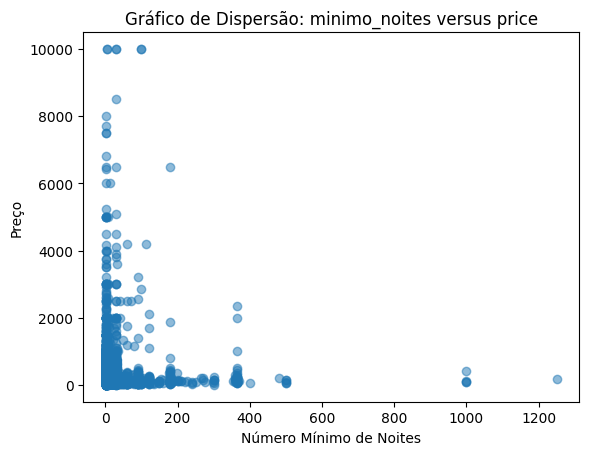

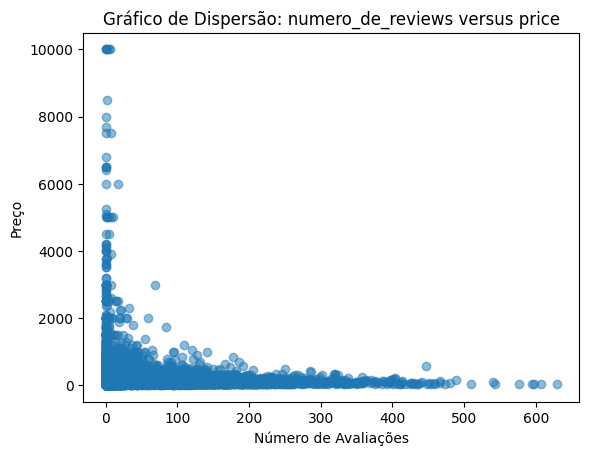

In [22]:

# Gráfico de Dispersão para minimo_noites versus price
plt.scatter(df_noites_reviews_preco['minimo_noites'], df_noites_reviews_preco['price'], alpha=0.5)
plt.title('Gráfico de Dispersão: minimo_noites versus price')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

# Gráfico de Dispersão para numero_de_reviews versus price
plt.scatter(df_noites_reviews_preco['numero_de_reviews'], df_noites_reviews_preco['price'], alpha=0.5)
plt.title('Gráfico de Dispersão: numero_de_reviews versus price')
plt.xlabel('Número de Avaliações')
plt.ylabel('Preço')
plt.show()

Com a primeira intersecção entre os gráficos de dispersão e as descrições estatísticas, não foi possível identificar um padrão de aumento dos preços a medida que as avaliações ou número mínimo de noites aumentava.

Será feito então a verificação adicionando as colunas dos bairros e tipos de quarto.


In [23]:
#Criamos o dataset com os valores que serão trabalhados.
colunas_interesse_review_noite_price_bairros = [col for col in dataset_one_hot_encoded_bairro_group.columns if any(bairro in col for bairro in colunas_grupo_bairro)]

#Adicionando também a coluna price e tipo de sala
colunas_interesse_review_noite_price_bairros.append('price')  # Adicionando a coluna 'price' à lista
colunas_interesse_review_noite_price_bairros.append('room_type')  # Adicionando a coluna 'room_type' à lista
colunas_interesse_review_noite_price_bairros.append('minimo_noites')  # Adicionando a coluna 'room_type' à lista
colunas_interesse_review_noite_price_bairros.append('numero_de_reviews')  # Adicionando a coluna 'room_type' à lista

dataset_one_hot_encoded_bairro_group = dataset_one_hot_encoded_bairro_group[colunas_interesse_review_noite_price_bairros]


In [24]:
#Para fazer a operação, é interessante retirmos o espaço do bairro de Staten Island assim ficando com:
dataset_one_hot_encoded_bairro_group = dataset_one_hot_encoded_bairro_group.rename(columns={'bairro_group_Staten Island': 'bairro_group_Staten_Island'})

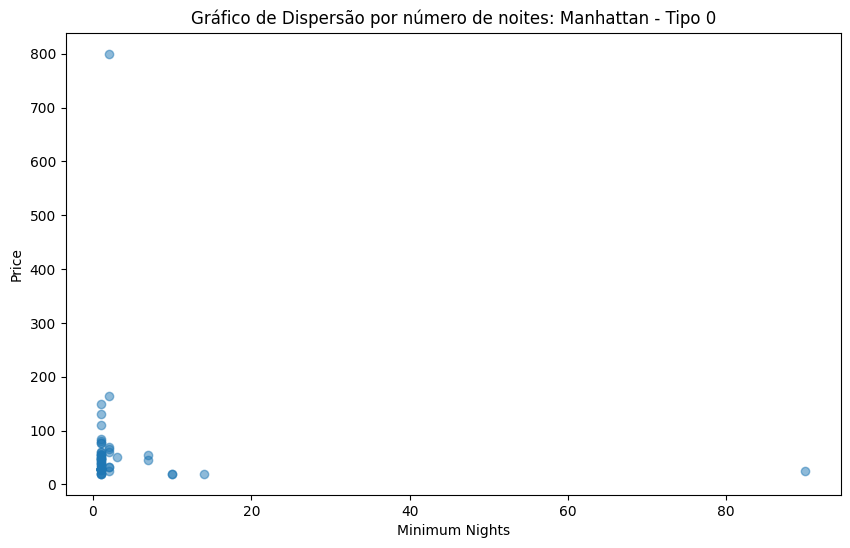

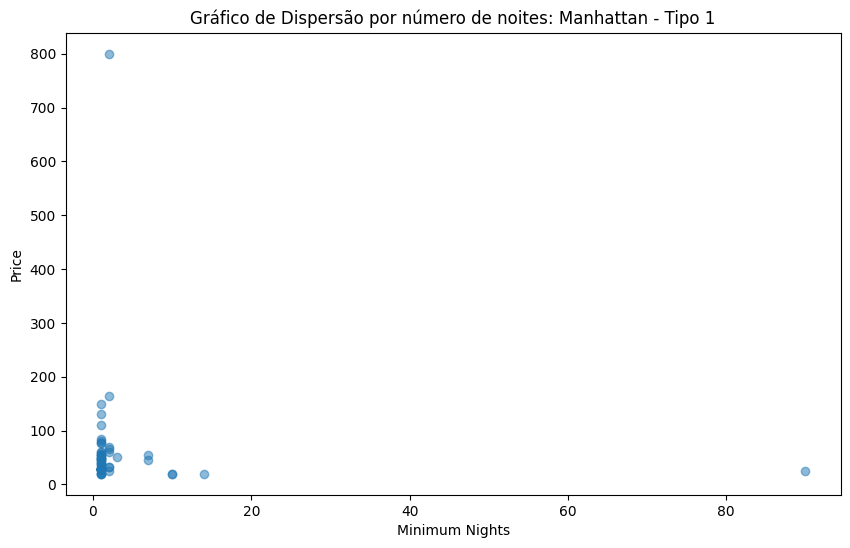

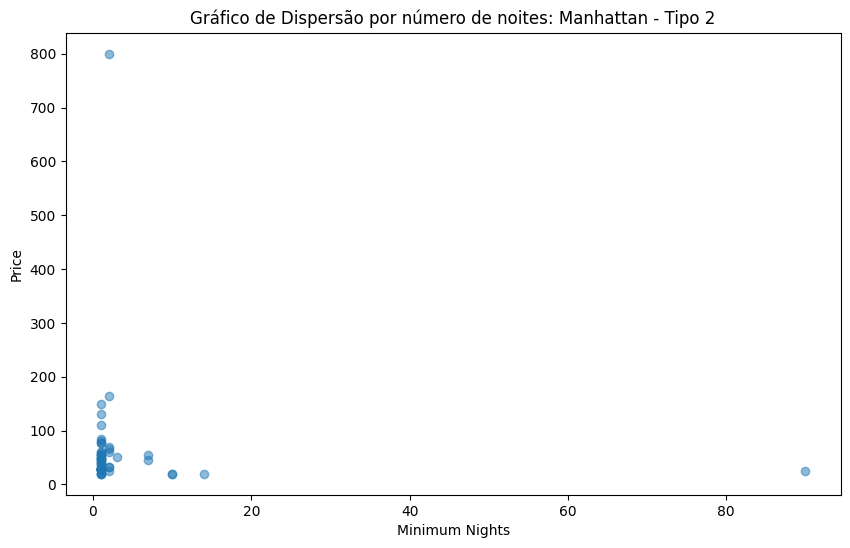

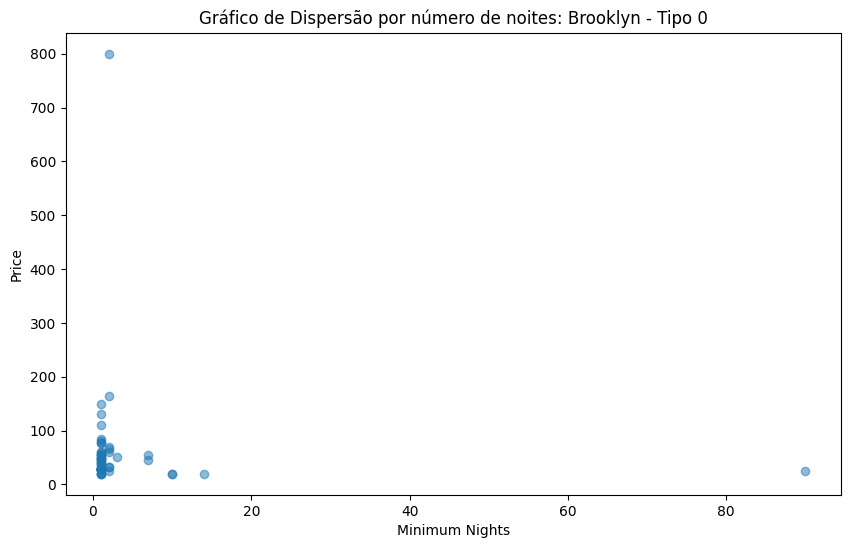

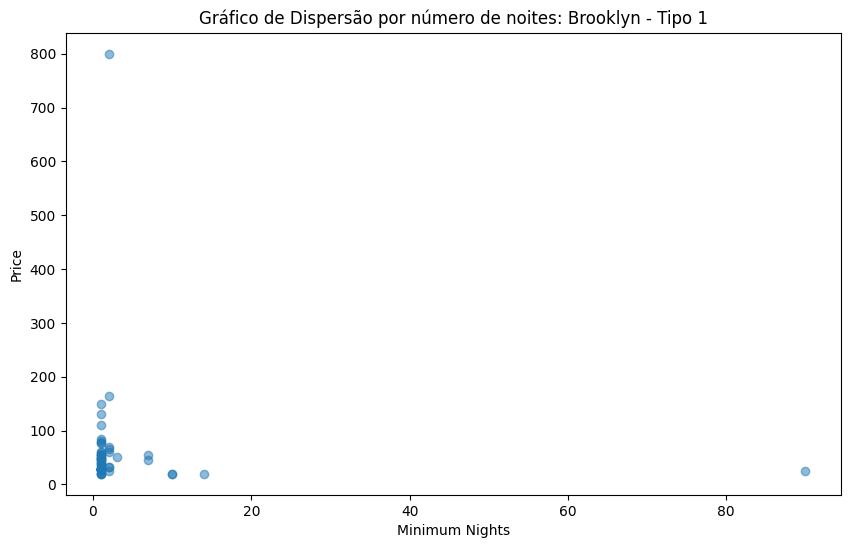

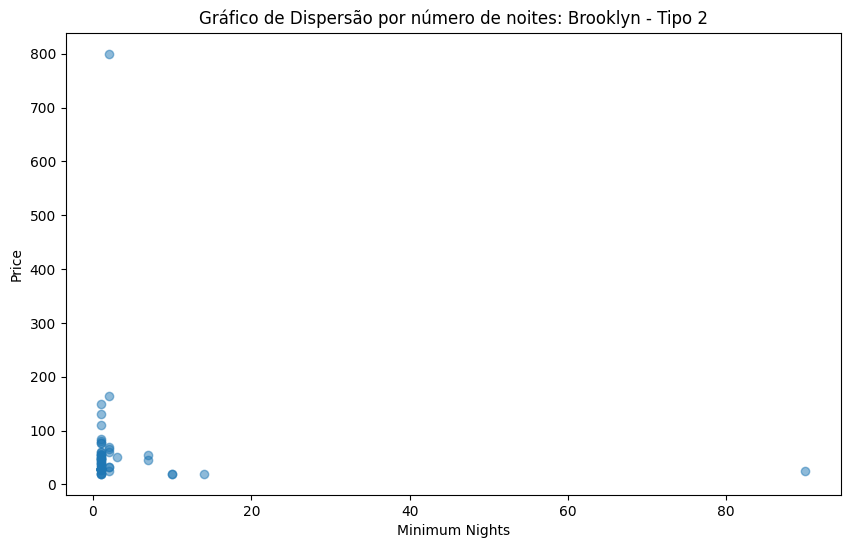

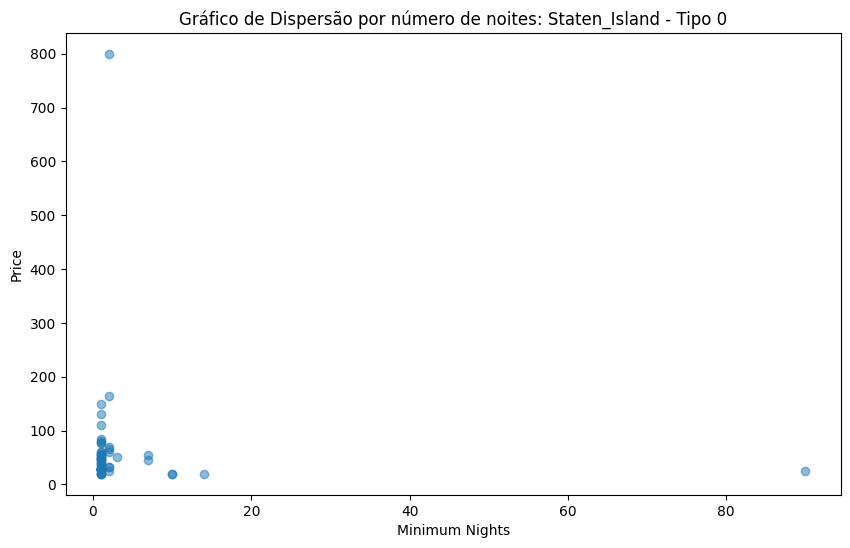

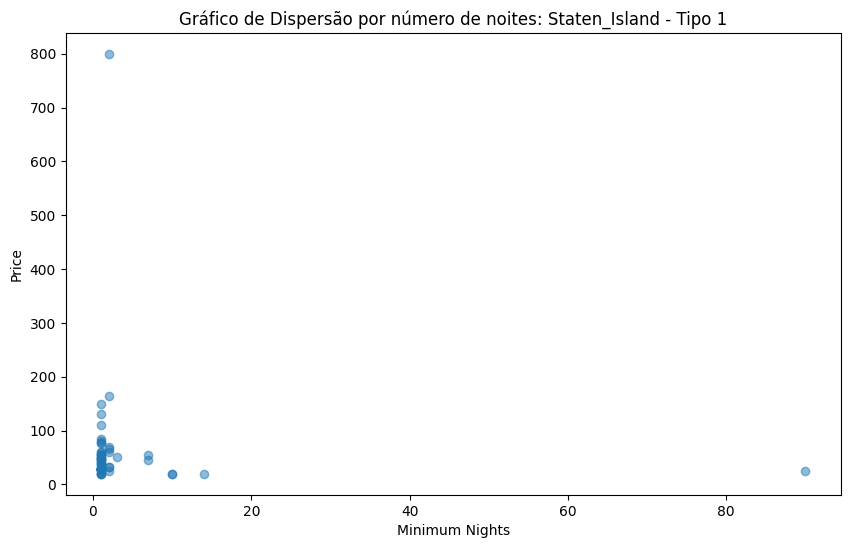

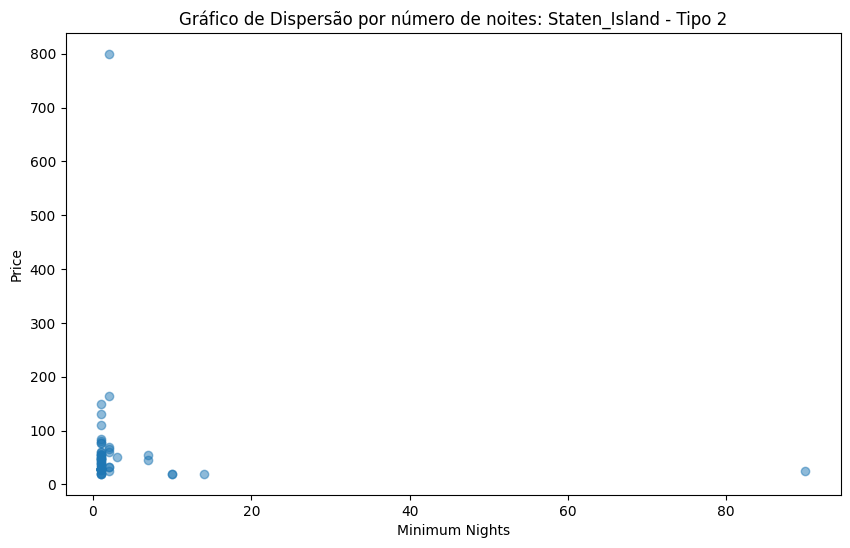

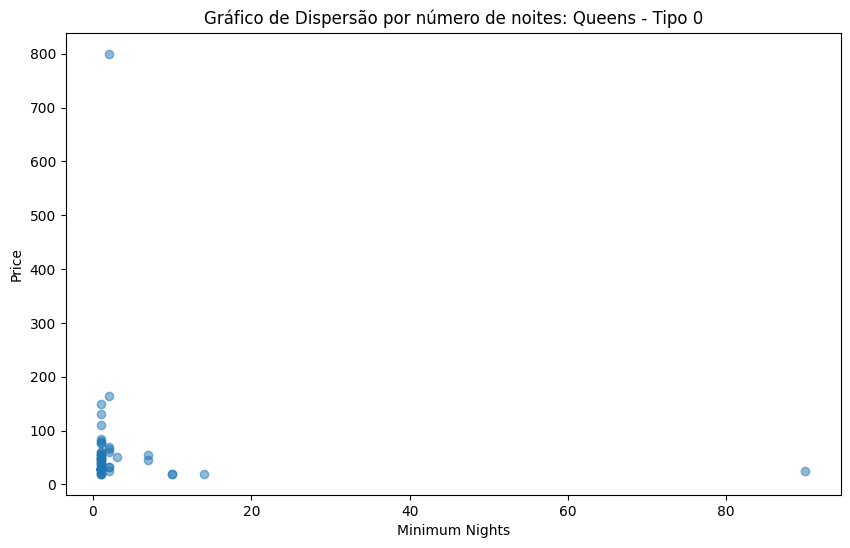

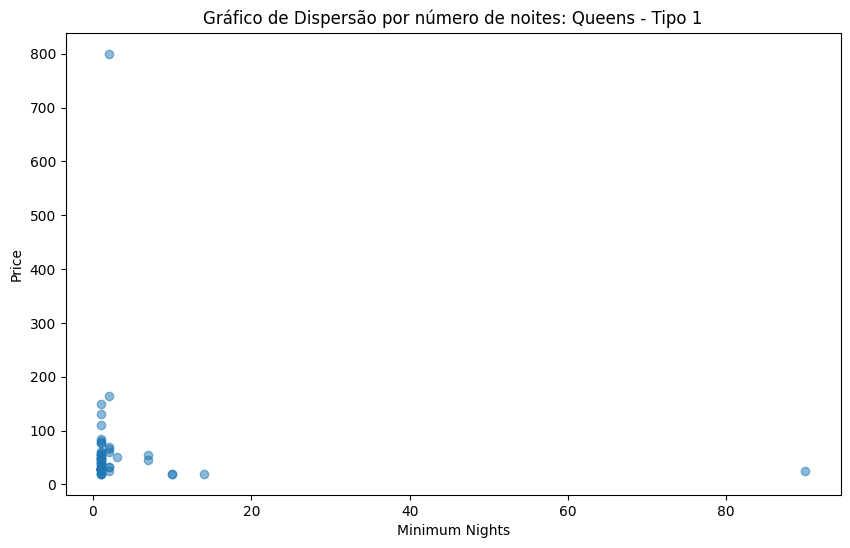

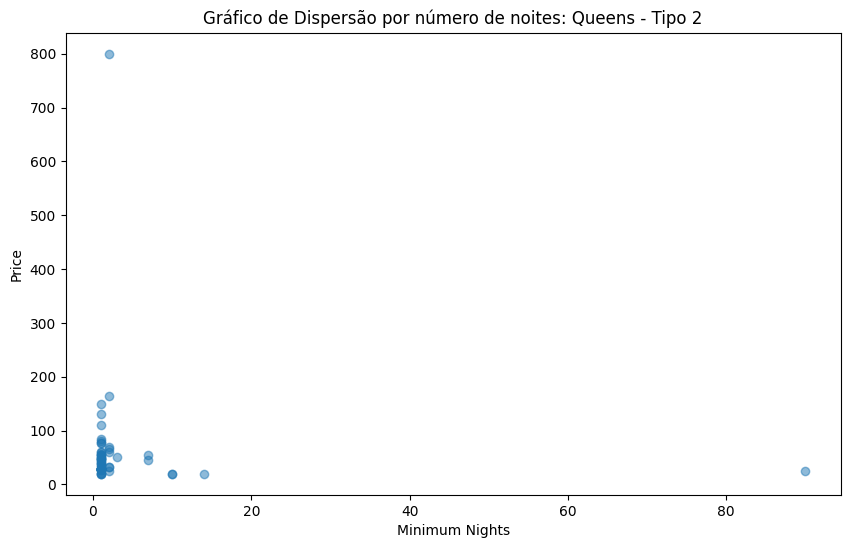

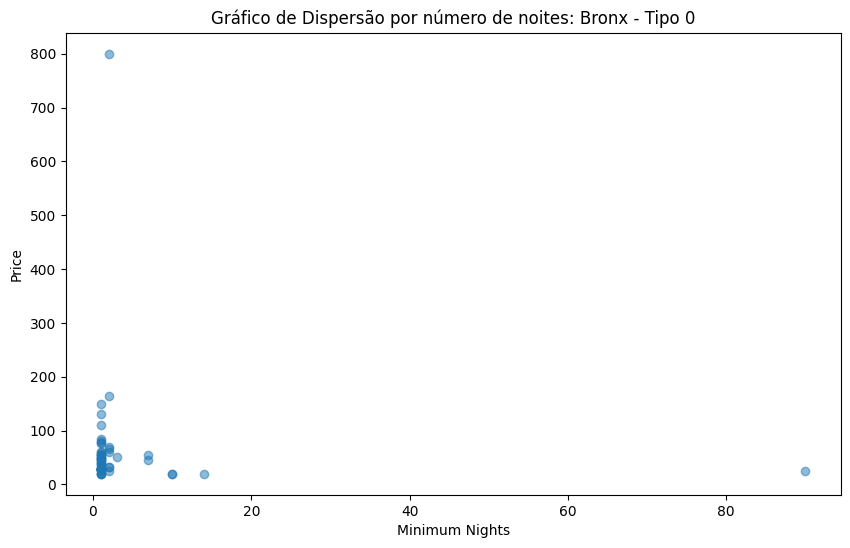

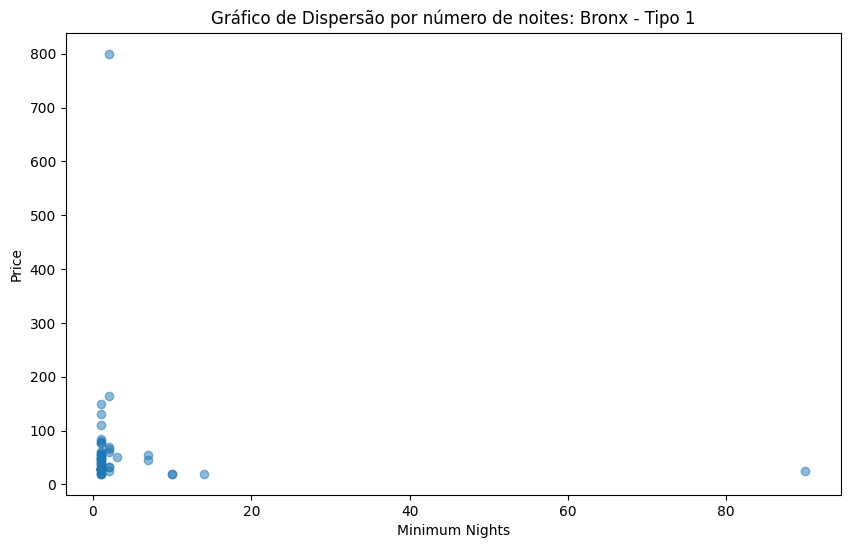

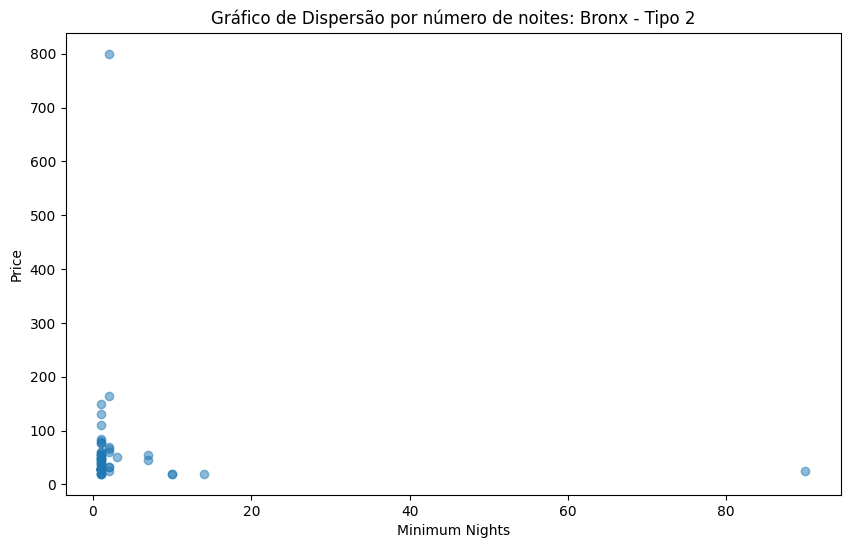

In [25]:
# Definir a ordem desejada para os bairros e tipos de quarto
ordem_bairros = ['Manhattan', 'Brooklyn', 'Staten_Island', 'Queens', 'Bronx']
ordem_tipos_quarto = [0, 1, 2]

# Loop pelos bairros
for bairro in ordem_bairros:

    # Filtrar por bairro
    grupo_bairro = dataset_one_hot_encoded_bairro_group.query(f'bairro_group_{bairro} == 1')

    # Loop pelos tipos de quarto
    for tipo_quarto in ordem_tipos_quarto:
        # # Filtrar por tipo de quarto
        grupo_quarto = dataset_one_hot_encoded_bairro_group.query(f'bairro_group_{chave.split(" - ")[0]} == 1 and room_type == {chave.split(" - Tipo ")[1]}')

        # Criar um gráfico de dispersão para 'minimo_noites' versus 'price'
        plt.figure(figsize=(10, 6))
        plt.scatter(grupo_quarto['minimo_noites'], grupo_quarto['price'], alpha=0.5)

        # Adicionar rótulos e título ao gráfico
        plt.title(f'Gráfico de Dispersão por número de noites: {bairro} - Tipo {tipo_quarto}')
        plt.xlabel('Minimum Nights')
        plt.ylabel('Price')

        # Exibir o gráfico
        plt.show()






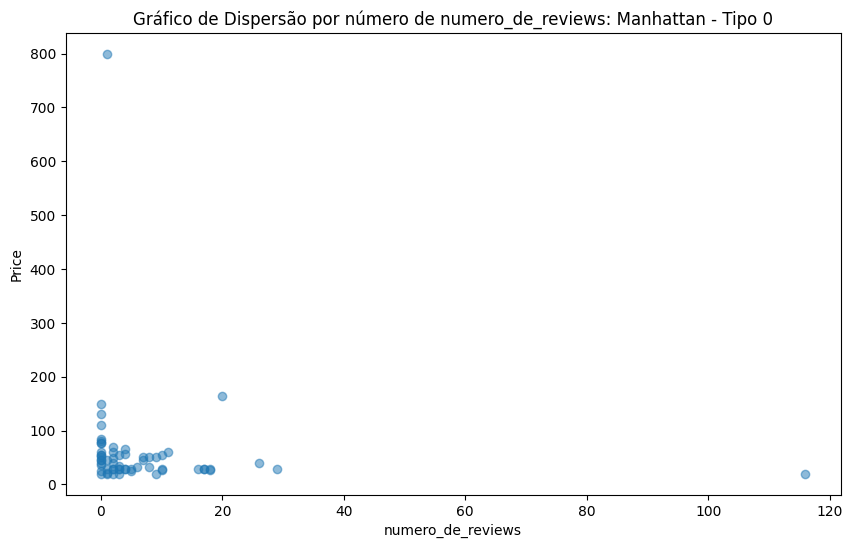

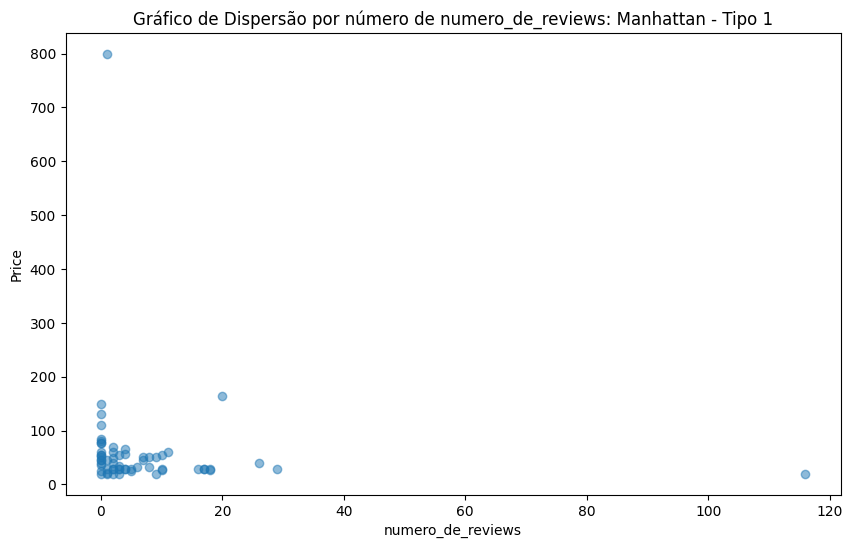

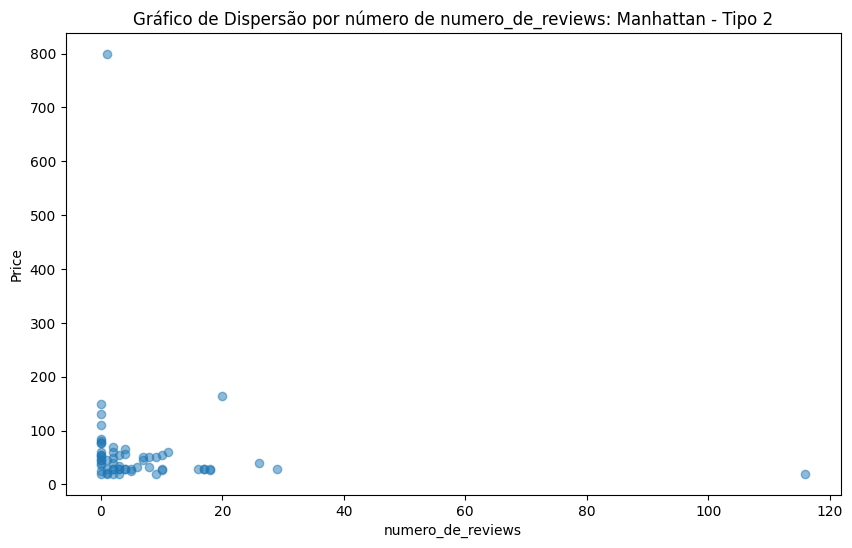

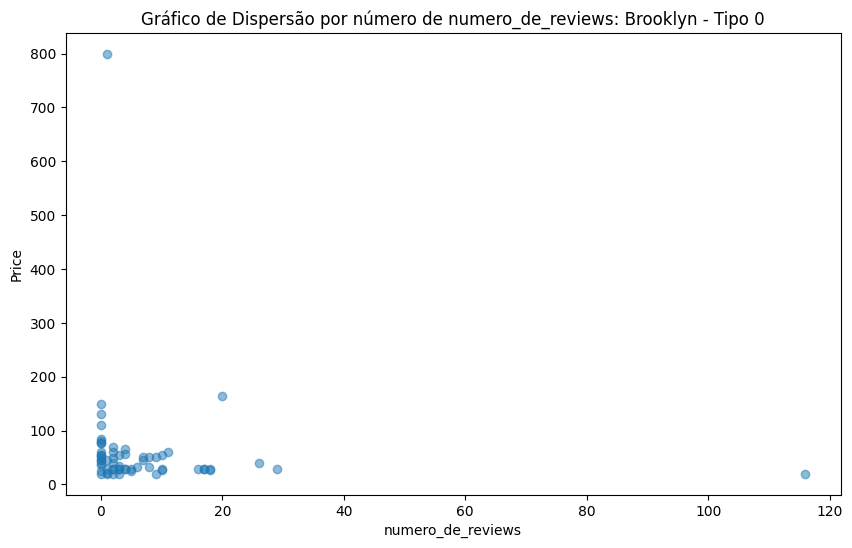

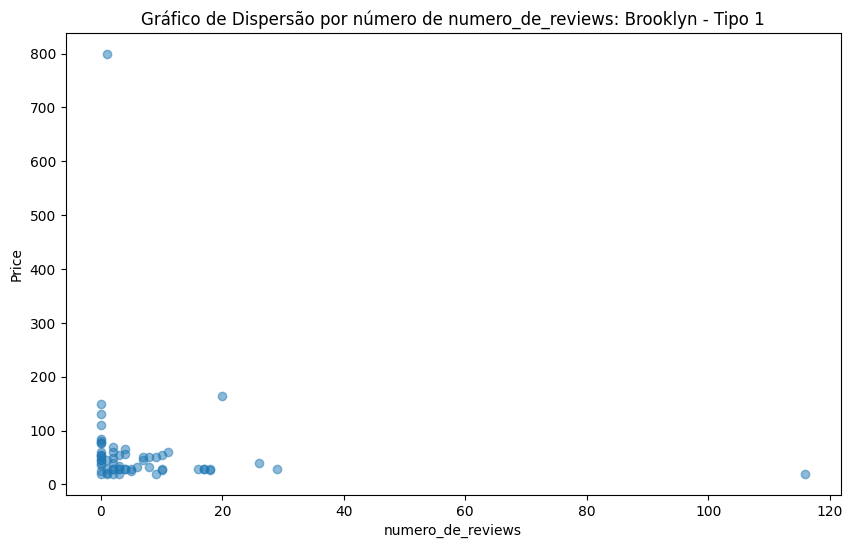

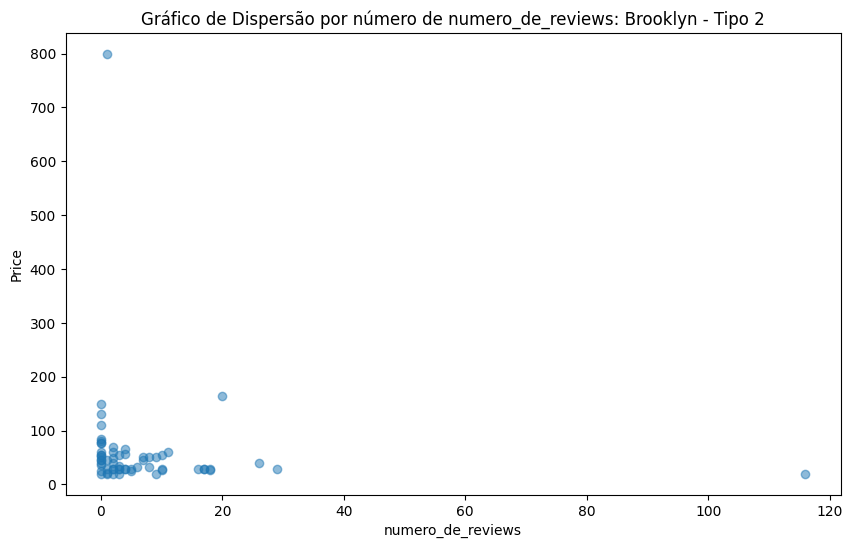

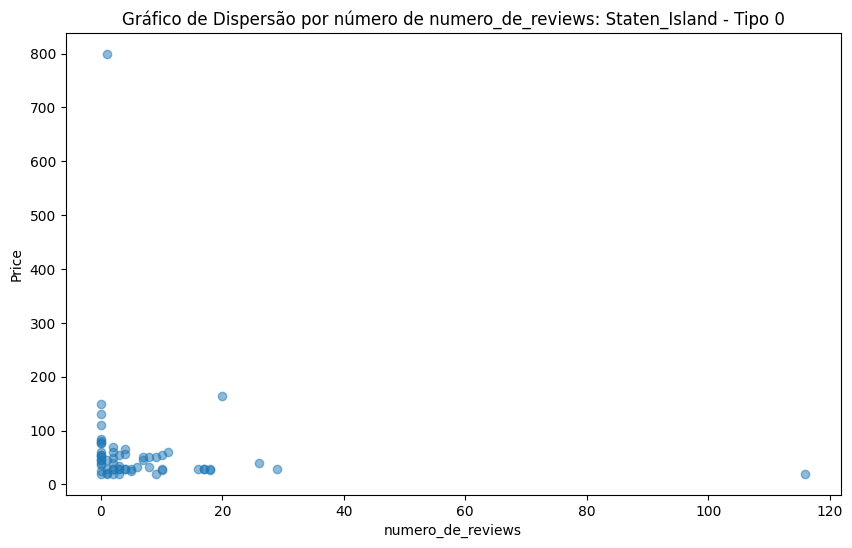

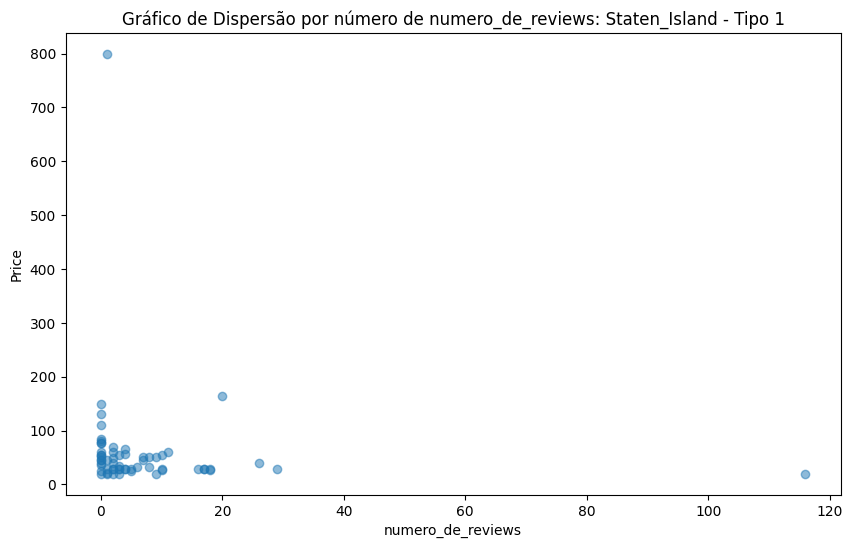

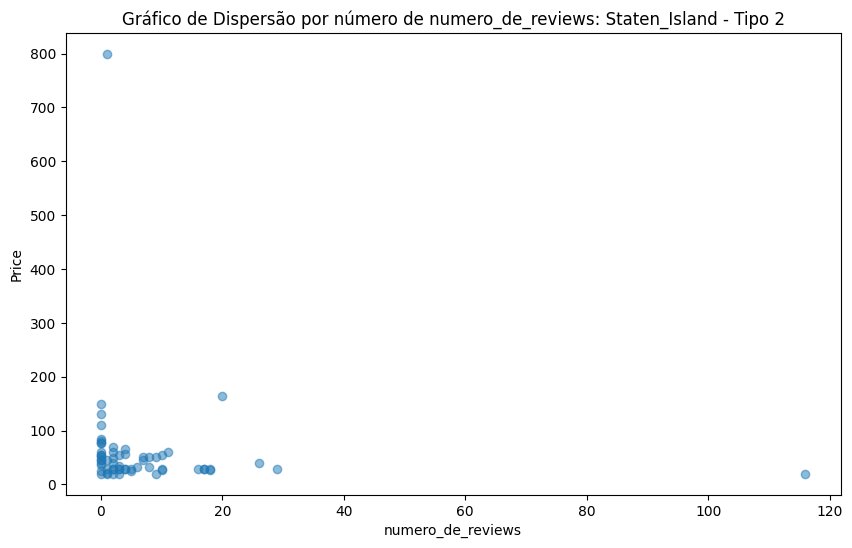

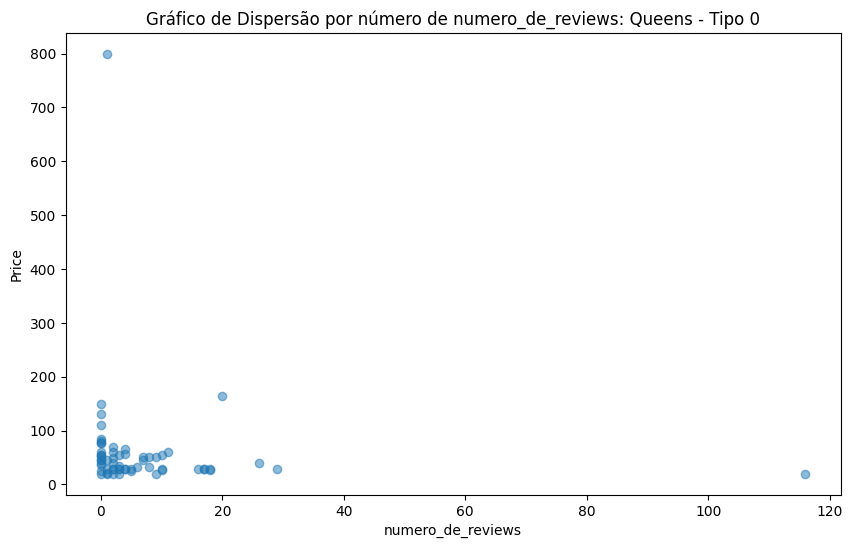

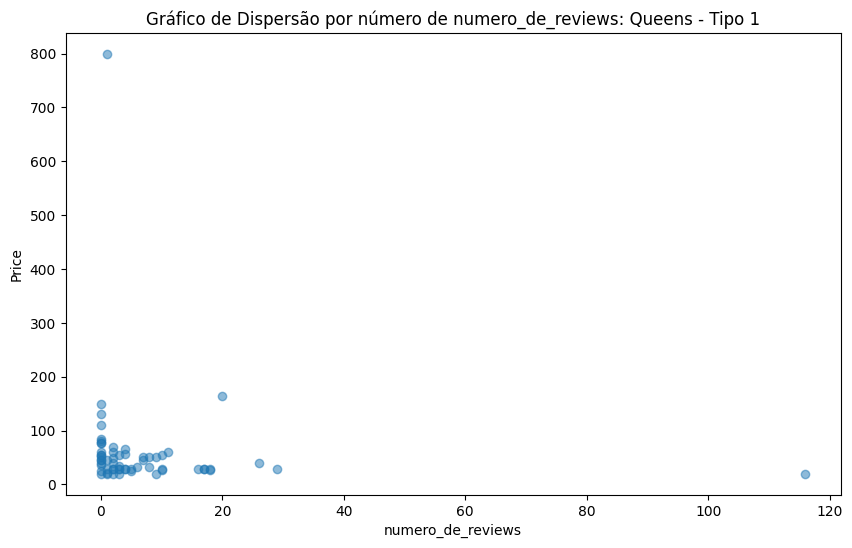

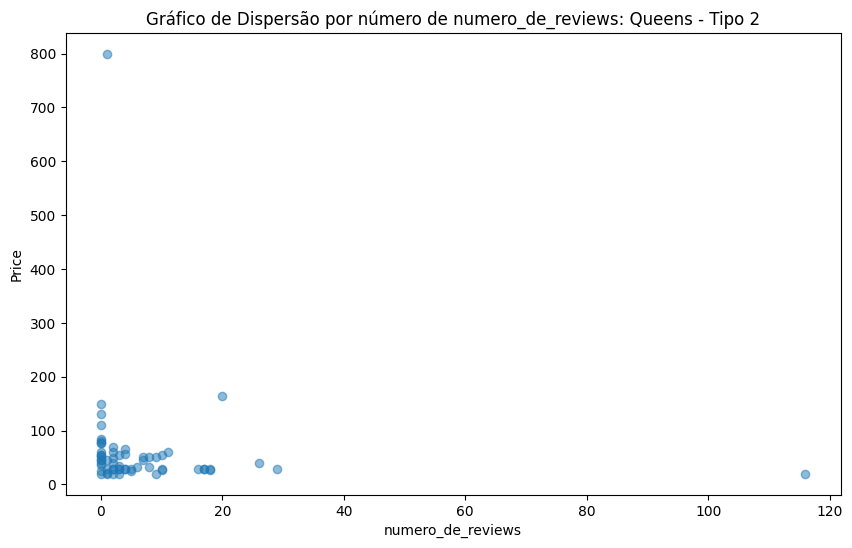

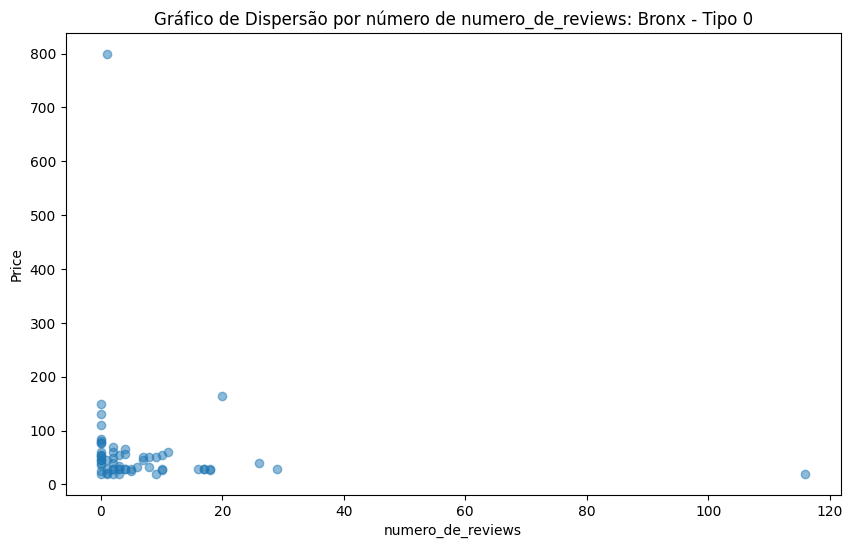

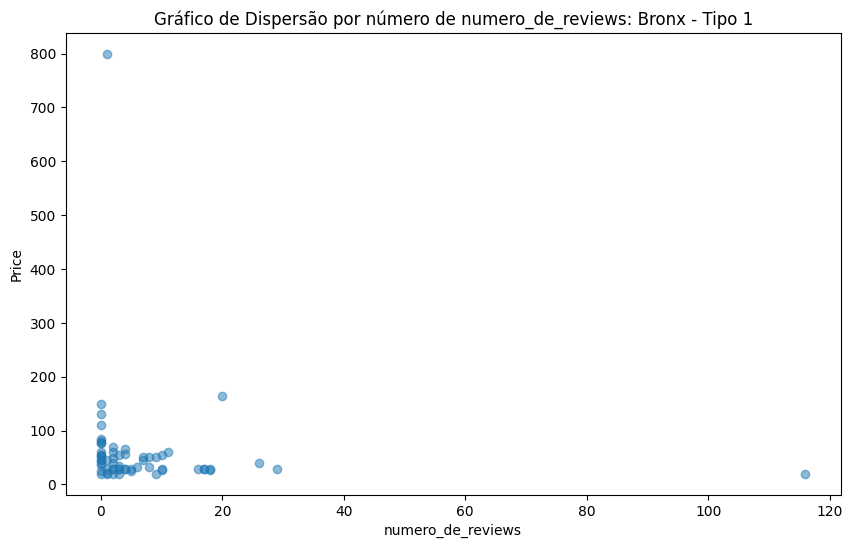

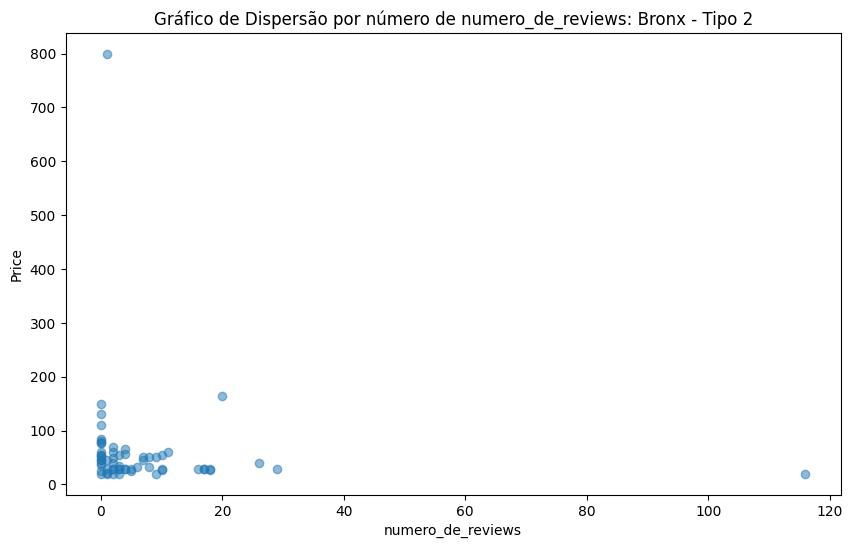

In [26]:
# Definir a ordem desejada para os bairros e tipos de quarto
ordem_bairros = ['Manhattan', 'Brooklyn', 'Staten_Island', 'Queens', 'Bronx']
ordem_tipos_quarto = [0, 1, 2]

# Loop pelos bairros
for bairro in ordem_bairros:

    # Filtrar por bairro
    grupo_bairro = dataset_one_hot_encoded_bairro_group.query(f'bairro_group_{bairro} == 1')

    # Loop pelos tipos de quarto
    for tipo_quarto in ordem_tipos_quarto:
        # # Filtrar por tipo de quarto
        grupo_quarto = dataset_one_hot_encoded_bairro_group.query(f'bairro_group_{chave.split(" - ")[0]} == 1 and room_type == {chave.split(" - Tipo ")[1]}')

        # Criar um gráfico de dispersão para 'minimo_noites' versus 'price'
        plt.figure(figsize=(10, 6))
        plt.scatter(grupo_quarto['numero_de_reviews'], grupo_quarto['price'], alpha=0.5)

        # Adicionar rótulos e título ao gráfico
        plt.title(f'Gráfico de Dispersão por número de numero_de_reviews: {bairro} - Tipo {tipo_quarto}')
        plt.xlabel('numero_de_reviews')
        plt.ylabel('Price')

        # Exibir o gráfico
        plt.show()






Feita a análise também por bairros e tipos de quartos, é visto que a quantidade de noites ou o número de reviews não interefere, pelo menos de forma expressiva, no valor dos imóveis.



---



C - Existe algum padrão no texto do nome do local para lugares de mais alto valor?


Para encontro de alguma semelhância,  é observado quanto é a variância dos preços em nosso dataset e depois feita um procura dentro destas médias por palavras parecidas.

In [27]:
#Encontramos primeiro a média os preços máximo, mínimos e médias.
print(dataset['price'].describe())

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


Observa-se que preço médio em blocos seria:
*   25%         69.000000
*   50%        106.000000
*   75%        175.000000





Com isto em mente vamos procurar a média mais alta em valores sendo de 500 até 10000

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

#Variancia dos preços a partir para encontro de palavras repetidas para cada
#uma das categorias.
lista_locais_valor = []
lista_locais_valor.append(dataset.query('0 < price < 69'))
lista_locais_valor.append(dataset.query('69 < price < 106'))
lista_locais_valor.append(dataset.query('106 < price < 175'))
lista_locais_valor.append(dataset.query('price > 500'))


contagem_palavras = []
for x in range(4):
    # Filtrar por locais de alto valor (ajuste conforme necessário)
    # Remover valores nulos da coluna 'nome'
    locais_alto_valor = lista_locais_valor[x].dropna(subset=['nome'])

    # Converter os valores da coluna 'nome' para strings
    locais_alto_valor['nome'] = lista_locais_valor[x]['nome'].astype(str)

    # Extrair palavras dos nomes
    palavras_nomes = ' '.join(locais_alto_valor['nome']).lower()
    palavras_nomes = re.findall(r'\b\w+\b', palavras_nomes)


    # Contar a frequência das palavras
    contagem_palavras.append(Counter(palavras_nomes))




<ipython-input-28-9923c039d4de>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locais_alto_valor['nome'] = lista_locais_valor[x]['nome'].astype(str)
<ipython-input-28-9923c039d4de>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locais_alto_valor['nome'] = lista_locais_valor[x]['nome'].astype(str)
<ipython-input-28-9923c039d4de>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Palavras mais comuns com valor abaixo do limite do grupo 3
Counter({'in': 223, 'bedroom': 153, '2': 136, 'luxury': 128, 'loft': 115, '3': 100, 'apt': 83, 'manhattan': 79, 'apartment': 79, 'the': 77, 'townhouse': 75, 'suite': 75, 'nyc': 74, 'with': 73, 'private': 70, 'park': 68, 'village': 66, 'of': 63, 'west': 59, 'brooklyn': 58, 'midtown': 58, '1': 56, 'w': 55, 'studio': 55, 'new': 53, 'bed': 53, 'no': 51, 'for': 50, 'service': 50, 'guest': 50, 'fee': 49, 'soho': 47, 'bath': 47, 'central': 46, 'duplex': 46, 'beautiful': 46, 'br': 44, 'penthouse': 44, 'to': 44, 'east': 43, 'spacious': 42, '4': 41, '5': 39, 'large': 38, 'heart': 37, 'home': 37, 'views': 36, 'location': 36, 'room': 35, 'beekman': 34, 'tower': 34, 'by': 33, 'near': 33, 'modern': 33, 'house': 31, 'chelsea': 31, 'one': 30, 'square': 30, '3br': 29, 'williamsburg': 29, 'amazing': 28, 'tribeca': 28, 'side': 28, 'city': 28, 'kitchen': 28, 'on': 27, 'terrace': 27, 'view': 27, 'brownstone': 27, 'at': 26, 'stunning': 26, 'york': 2

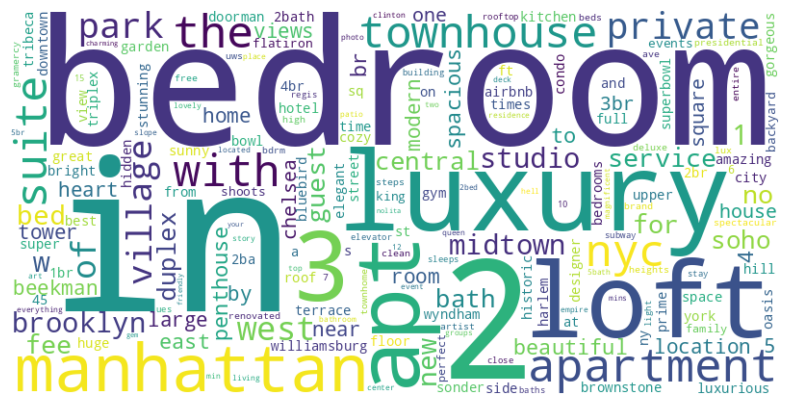

In [29]:

print(f'Palavras mais comuns com valor abaixo do limite do grupo {x}')
print(contagem_palavras[3])

# Criar uma nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contagem_palavras[3])

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

Como não houve um valor estipulando um custo de quanto seria o valor de um aluguel de um apartamento luxuoso, foi utilizado o valor de alguel acima de 500 por dia.

Dentro deste escopo, foram vistas que Luxury, townhouse e Loft aparecerem algumas vezes indicando que são possíveis palavras para imóveis de mais alto luxo.

# Seção 3 - Explique como você faria a previsão do preço:

1 - Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê?

Para ser feita a previsão dos preços, pelo que foi visto no estudo, seriam utilizados: 'bairro_group' e 'room_type' como início utilizando a tranformação one hoted encoded.
Caso a pesquisa seja mais específica, também pode ser analisada a diferença que a variável 'bairro' traz nestas predições de preços.



---



2 - Qual tipo de problema estamos resolvendo (regressão, classificação)?

O tipo do problema é de regressão.



---



3 - Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

A escolha de um modelo de predição pode se tornar uma tarefa experimental, então seria dado início com o estudo de um modelo mais simples de regressão como Regressão Linear Múltipla. Este modelo apresenta um bom início a um estudo de previsão de valores por ser simples e de fácil interpretação devido aos coeficientes, que quando mudam, causam uma mudança direta ao resultado. Em contras, é possível observar no nome que trata-se de relações lineares, assim tendo esta limitação de complexidade, também apresenta sensibilidade a *outliners* e pode apresentar problemas se utilizado variáveis com alta correlação entre si.





---



4 - Qual medida de performance do modelo foi escolhida e por quê?


Normalmente para casos de regressão, pode-se utilizar como métricas de performances dos modelos:

*   R²
*   MAE ou MSE

# Seção 4 - Supondo um apartamento com as seguintes características:


{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}




---



Qual seria a sua sugestão de preço?


Pode-se trazer aqui um gráfico apresentando os valores médio quando se procura um aluguel em bairro_group': 'Manhattan', 'bairro': 'Midtown' e  'room_type': 'Entire home/apt' e a partir deste parâmetros observar a média de valores.

In [30]:
#Cria-se um dataset com os valores que estamos buscando
dataset_bairro_midtown_price_room_type = dataset_one_hot_encoded_bairro[['bairro_Midtown','price','room_type','bairro_group']]

In [31]:
#Feita separação de 'bairro_group': 'Manhattan' e 'room_type': 'Entire home/apt'
df_filtrado_manhattan_entire_home = dataset_bairro_midtown_price_room_type.query("bairro_group == 'Manhattan' and room_type == 0 and bairro_Midtown == 1")


In [32]:
#Estatísticas sobre os dados procurados
df_filtrado_manhattan_entire_home.describe()

,bairro_Midtown,price,room_type
count,1100.0,1100.000000,1100.0
mean,1.0,301.268182,0.0
std,0.0,273.103126,0.0
min,1.0,70.000000,0.0
25%,1.0,165.000000,0.0
50%,1.0,225.000000,0.0
75%,1.0,340.000000,0.0
max,1.0,5100.000000,0.0


É possível observar que existe um alto desvio padrão, assim sendo é possível que nesta amostra de dados tenhamos um número bem grande de outliers, com isto é necessário fazer um tratamento em nosso dataset para diminuir um pouco este problema.

Utilizando z_scores para redução de outliners.

In [33]:
from scipy.stats import zscore
z_scores = zscore(df_filtrado_manhattan_entire_home['price'])
outliers = (z_scores > 3) | (z_scores < -3)
dataset_sem_outliers = df_filtrado_manhattan_entire_home[~outliers]
dataset_sem_outliers.describe()

,bairro_Midtown,price,room_type
count,1086.0,1086.000000,1086.0
mean,1.0,281.709024,0.0
std,0.0,180.917146,0.0
min,1.0,70.000000,0.0
25%,1.0,165.000000,0.0
50%,1.0,225.000000,0.0
75%,1.0,338.750000,0.0
max,1.0,1100.000000,0.0


Utilizando IQR (Intervalo Interquartil) para redução de outliners.

In [34]:
Q1 = df_filtrado_manhattan_entire_home['price'].quantile(0.25)
Q3 = df_filtrado_manhattan_entire_home['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df_filtrado_manhattan_entire_home['price'] < Q1 - 1.5 * IQR) | (dataset['price'] > Q3 + 1.5 * IQR)
dataset_sem_outliers = df_filtrado_manhattan_entire_home[~outliers]
dataset_sem_outliers.describe()

<ipython-input-34-9e5bd03aad9f>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset_sem_outliers = df_filtrado_manhattan_entire_home[~outliers]


,bairro_Midtown,price,room_type
count,993.0,993.000000,993.0
mean,1.0,236.917422,0.0
std,0.0,105.449839,0.0
min,1.0,70.000000,0.0
25%,1.0,159.000000,0.0
50%,1.0,210.000000,0.0
75%,1.0,295.000000,0.0
max,1.0,600.000000,0.0


Tendo em vista um redução mais interessante dos outlinear com a remoção de 107 imóveis, optou-se pela ajuste de outlinears utilizando os quartis.

Com isto, utilizamos a média do valor e a suposição do valor para o imóvel seria de mais ou menos 236.



---



Criando um modelo de ML utilizando o Regressão Linear Múltipla e a base com todos os bairros de manhattam e com outliners.

In [35]:
dataset_one_hot_encoded_bairro

,id,nome,host_id,host_name,bairro_group,latitude,longitude,room_type,price,minimo_noites,...,bairro_Westerleigh,bairro_Whitestone,bairro_Williamsbridge,bairro_Williamsburg,bairro_Willowbrook,bairro_Windsor Terrace,bairro_Woodhaven,bairro_Woodlawn,bairro_Woodrow,bairro_Woodside
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,40.75362,-73.98377,0,225,1,...,0,0,0,0,0,0,0,0,0,0
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,40.80902,-73.94190,1,150,3,...,0,0,0,0,0,0,0,0,0,0
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,40.68514,-73.95976,0,89,1,...,0,0,0,0,0,0,0,0,0,0
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,40.79851,-73.94399,0,80,10,...,0,0,0,0,0,0,0,0,0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,40.74767,-73.97500,0,200,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,40.67853,-73.94995,1,70,2,...,0,0,0,0,0,0,0,0,0,0
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,40.70184,-73.93317,1,40,4,...,0,0,0,0,0,0,0,0,0,0
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,40.81475,-73.94867,0,115,10,...,0,0,0,0,0,0,0,0,0,0
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,40.75751,-73.99112,2,55,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Tranformando as variáveis do tipo de quarto em one hot encoded
colunas_para_one_hot = ['room_type', 'bairro_group']
dataset_one_hot_encoded_bairro = pd.get_dummies(dataset_one_hot_encoded_bairro, columns=colunas_para_one_hot)


In [37]:
#Captura todos as colunas que contenham 'bairro' no nomes
colunas_bairro = dataset_one_hot_encoded_bairro.filter(like='bairro')

#Outras colunas desejadas
colunas_desejadas = ['price','room_type_0','room_type_1','room_type_2']

#Filtramos as colunas 'price' e 'room_type'
dataset_one_hot_encoded_bairro = dataset_one_hot_encoded_bairro[colunas_desejadas]


# Criando um novo DataFrame com as colunas selecionadas juntas
dataset_com_colunas_bairro = pd.concat([dataset_one_hot_encoded_bairro, colunas_bairro], axis=1)


# Encontrado um modelo com o AutoML (Biblioteca H2O)

In [39]:
!pip install h2o
!pip install pydataset

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 324, in run
    session = self.get_default_session(options)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 98, in get_default_session
    self._session = self.enter_context(self._build_session(options))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 125, in _build_session
    session = PipSession(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/network/session.py", line 342, in __init__
    self.headers["User-Agent"] = user_agent()
  File "/usr/local/lib

In [40]:
import h2o
from h2o.automl import H2OAutoML
import matplotlib as plt
%matplotlib inline

#Import h2o grid search
import h2o.grid
from h2o.grid.grid_search import H2OGridSearch
#Para pesquisa, utilizado a fonte: https://github.com/hyunjoonbok/Python-Projects/blob/master/H2O/Complete%20guide%20to%20Machine%20Learning%20with%20H2O%20(AutoML).ipynb
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp2c5jira5
  JVM stdout: /tmp/tmp2c5jira5/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp2c5jira5/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_unknownUser_tqzdxv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [41]:
#Utilizando IQR (Intervalo Interquartil) para redução de outliners.
Q1 = dataset_com_colunas_bairro['price'].quantile(0.25)
Q3 = dataset_com_colunas_bairro['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = (dataset_com_colunas_bairro['price'] < Q1 - 1.5 * IQR) | (dataset['price'] > Q3 + 1.5 * IQR)
dataset_com_colunas_bairro_sem_outliers = dataset_com_colunas_bairro[~outliers]


In [42]:
# Convertendo dados para H2OFrames
data_frame = h2o.H2OFrame(dataset_com_colunas_bairro_sem_outliers)

#SEparando traino, teste
train, valid, test = data_frame.split_frame([0.70, 0.15], seed=42)
print("train:%d valid:%d test:%d" % (train.nrows, valid.nrows, test.nrows))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
train:32228 valid:6770 test:6924


In [43]:
#Separando as colunas que setão utilizadas
X_colunas = data_frame.columns[1:]
y = "price"

In [44]:
# Definindo parâmetros para o modelo do autoML
aml = H2OAutoML(max_models=20, seed=42)
aml.train(x=X_colunas, y=y, training_frame=train, validation_frame=valid)

KeyboardInterrupt: 

In [ ]:
#Trazendo a tabela de todos os algorítmos criados
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

In [ ]:
#Capturando o melhor modelo encontrado pelo H2O
best_model = aml.get_best_model()
print(best_model)

In [ ]:
#Observando os valores do melhor algorítmo encontrado
best_model.model_performance(test)

In [ ]:
#Salvando o modelo criado
model_path = h2o.save_model(model=best_model,path='', force=True)
print(model_path)


O modelo apresentou métricas com erros de valor elevado como:


*   rmse = 46.7206
*   mse	= 2182.81
*   mae = 34.1678
*   rmsle = 0.391171




Com estes resultados, o passo mais aconselhável seria voltar as variáveis descobrir outras relações entre as variáveis a fim de encontrar melhores resultados.

# Utilizando o modelo encontrado

Neste momendo, após encontrar o modelo, ele é carregado e utilizado para a predição da variáveis 'price'.

In [45]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import matplotlib as plt
%matplotlib inline

#Import h2o grid search
import h2o.grid
from h2o.grid.grid_search import H2OGridSearch

In [38]:
#Caso seja necessário fazer o login do modelo criado anteriormente
h2o.init()

file_id = '1MFa7E-bXNpEYiYPVcdag1yh_kC4rH0AT'

# URL de compartilhamento público do Google Drive
url = f'https://drive.google.com/uc?id={file_id}'

# Nome do arquivo local que será salvo
output_model = 'modelo_h2o'

# Faz o download do arquivo do Google Drive e salva localmente
gdown.download(url, output_model, quiet=False)

#Fazendo load do modelo encontrado
loaded_model = h2o.load_model(path=output_model)


NameError: name 'h2o' is not defined

Criamos o dataset com os valores que foram avaliados como os mais importantes para implementação do modelo.

In [ ]:
 #Traduzindo os valores que precisamos para nosso dataframe
colunas_dataframe = dataset_com_colunas_bairro_sem_outliers.columns

lista_colunas = list(colunas_dataframe)

In [ ]:
# DataFrame original com as colunas
df_original = pd.DataFrame(index=colunas_dataframe, columns=[lista_colunas
])

# Lista de colunas para as quais você deseja atribuir valor 1
colunas_com_valores = ['room_type_0', 'bairro_group_Manhattan', 'bairro_Midtown']

# Criar um DataFrame com todas as colunas preenchidas com zeros
novo_dataframe = pd.DataFrame(0, index=[0], columns=lista_colunas)

# Atribuir valor 1 para as colunas desejadas
novo_dataframe.loc[0, colunas_com_valores] = 1


data_frame = h2o.H2OFrame(novo_dataframe)


In [ ]:
previsoes_novos_dados = loaded_model.predict(data_frame)

In [ ]:
#Apresenta o valor encontrado pelo modelo
print('Valore encontrado pelo modelo: ',previsoes_novos_dados)

Por fim no estudo, o valor encontrado pelo modelo foi 196.762